In [51]:
import numpy as np # linear algebra
import pandas as pd # data processing

In [52]:
df=pd.read_csv('Bank Customer Churn Prediction.csv')

In [53]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [54]:
df.shape

(10000, 12)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [56]:
df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [57]:
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [58]:
for i in df.columns:
  dis = len(df[i].unique())
  print(f"{i} - {dis}")

customer_id - 10000
credit_score - 460
country - 3
gender - 2
age - 70
tenure - 11
balance - 6382
products_number - 4
credit_card - 2
active_member - 2
estimated_salary - 9999
churn - 2


In [59]:
df['churn'].value_counts()

0    7963
1    2037
Name: churn, dtype: int64

In [60]:
df.drop(columns=['customer_id'],inplace=True)

# **EDA**

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [62]:
df1=df.drop(['country','gender'],axis=1)

In [63]:
df1

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,42,2,0.00,1,1,1,101348.88,1
1,608,41,1,83807.86,1,0,1,112542.58,0
2,502,42,8,159660.80,3,1,0,113931.57,1
3,699,39,1,0.00,2,0,0,93826.63,0
4,850,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0
9996,516,35,10,57369.61,1,1,1,101699.77,0
9997,709,36,7,0.00,1,0,1,42085.58,1
9998,772,42,3,75075.31,2,1,0,92888.52,1


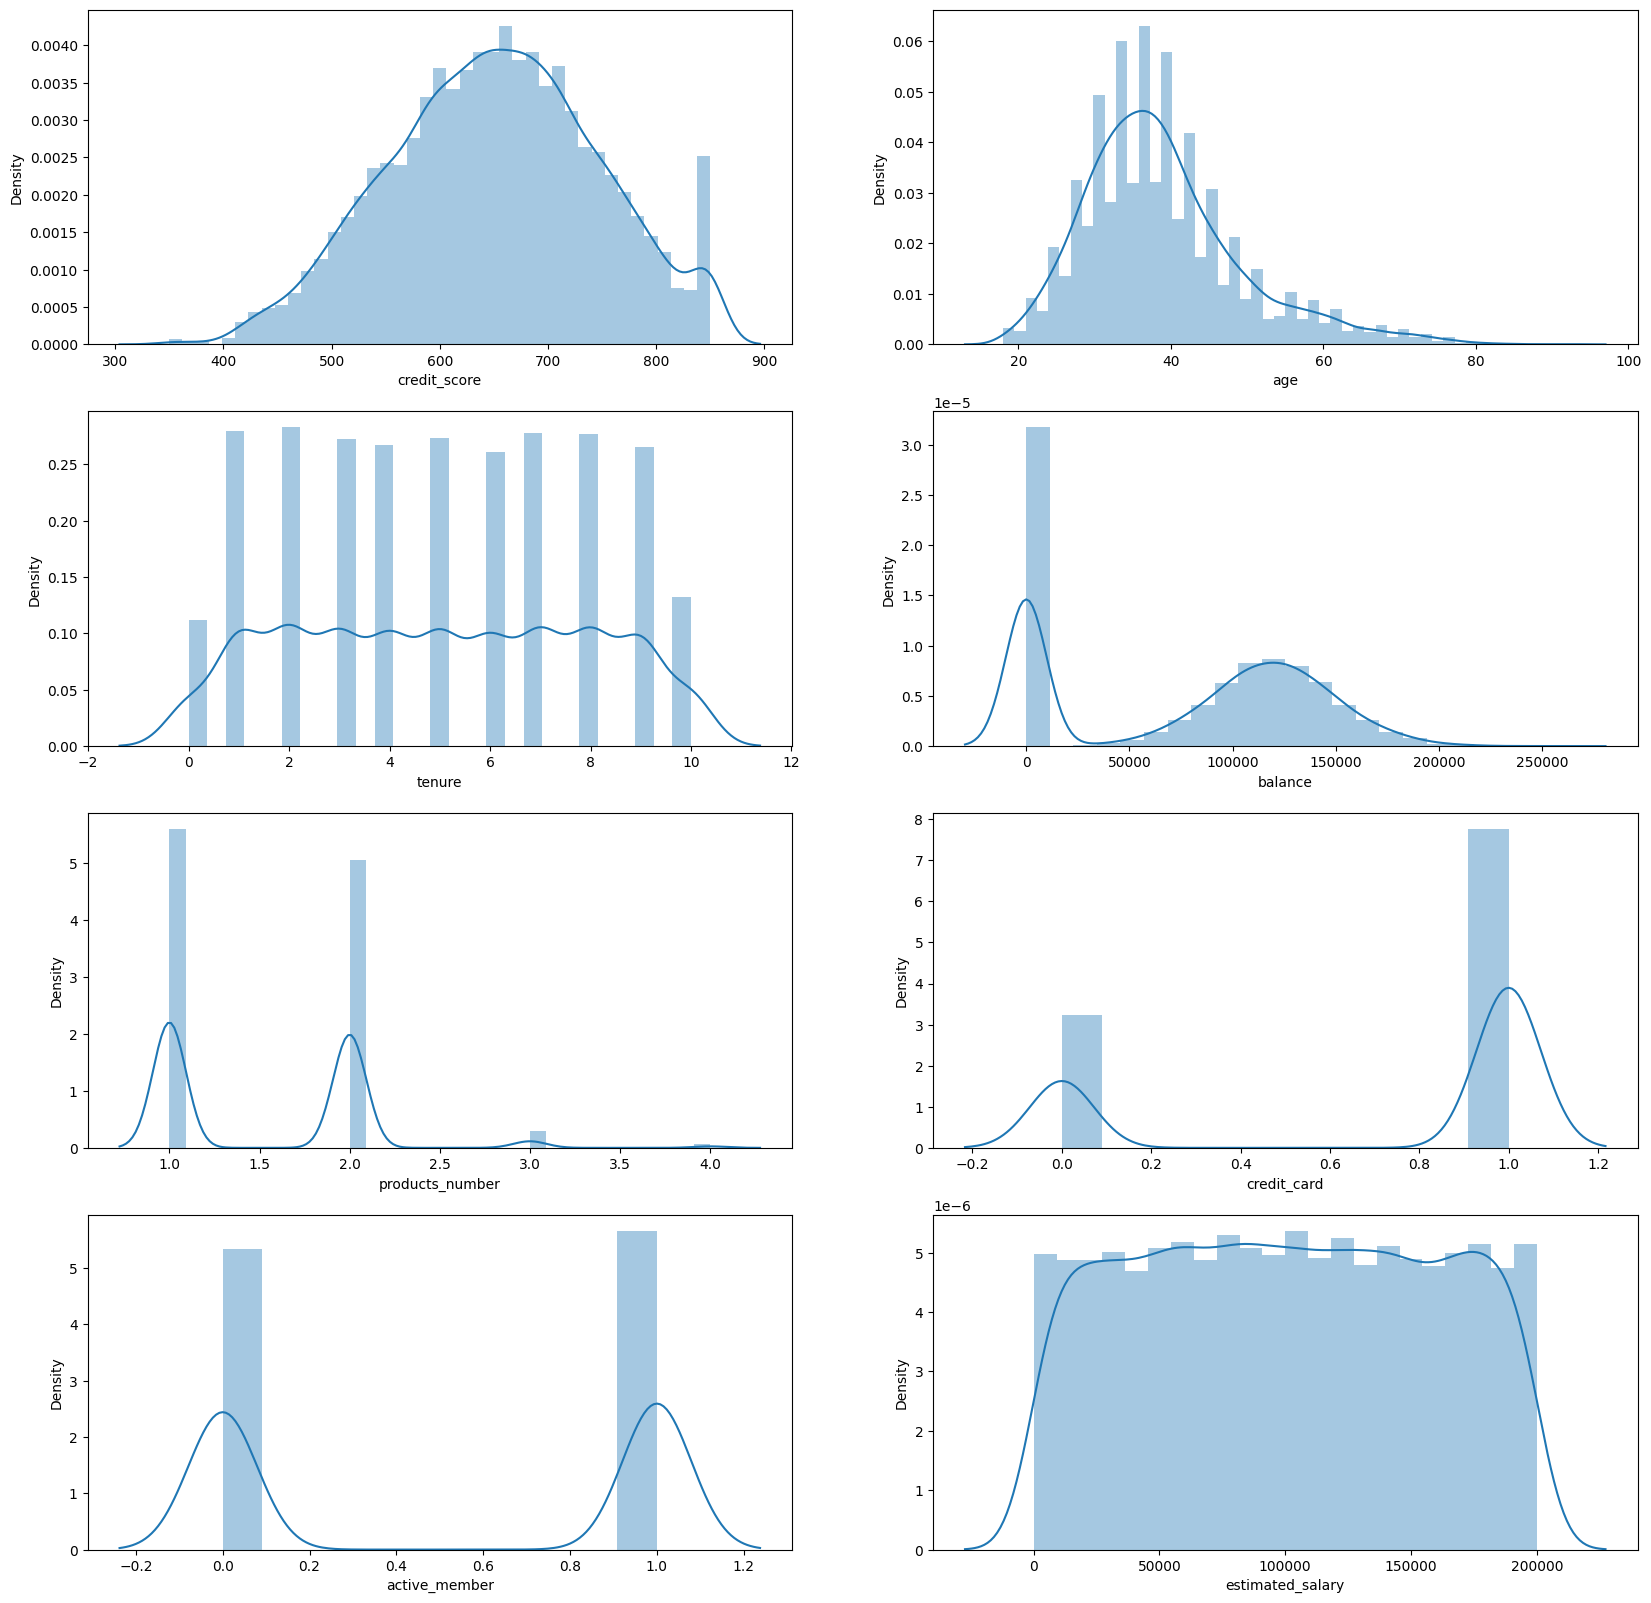

In [64]:
fig, axes = plt.subplots(nrows = 4, ncols = 2)    
axes = axes.flatten()         
fig.set_size_inches(20,20)

for ax, col in zip(axes, df1.columns):
  sns.distplot(df[col], ax = ax)

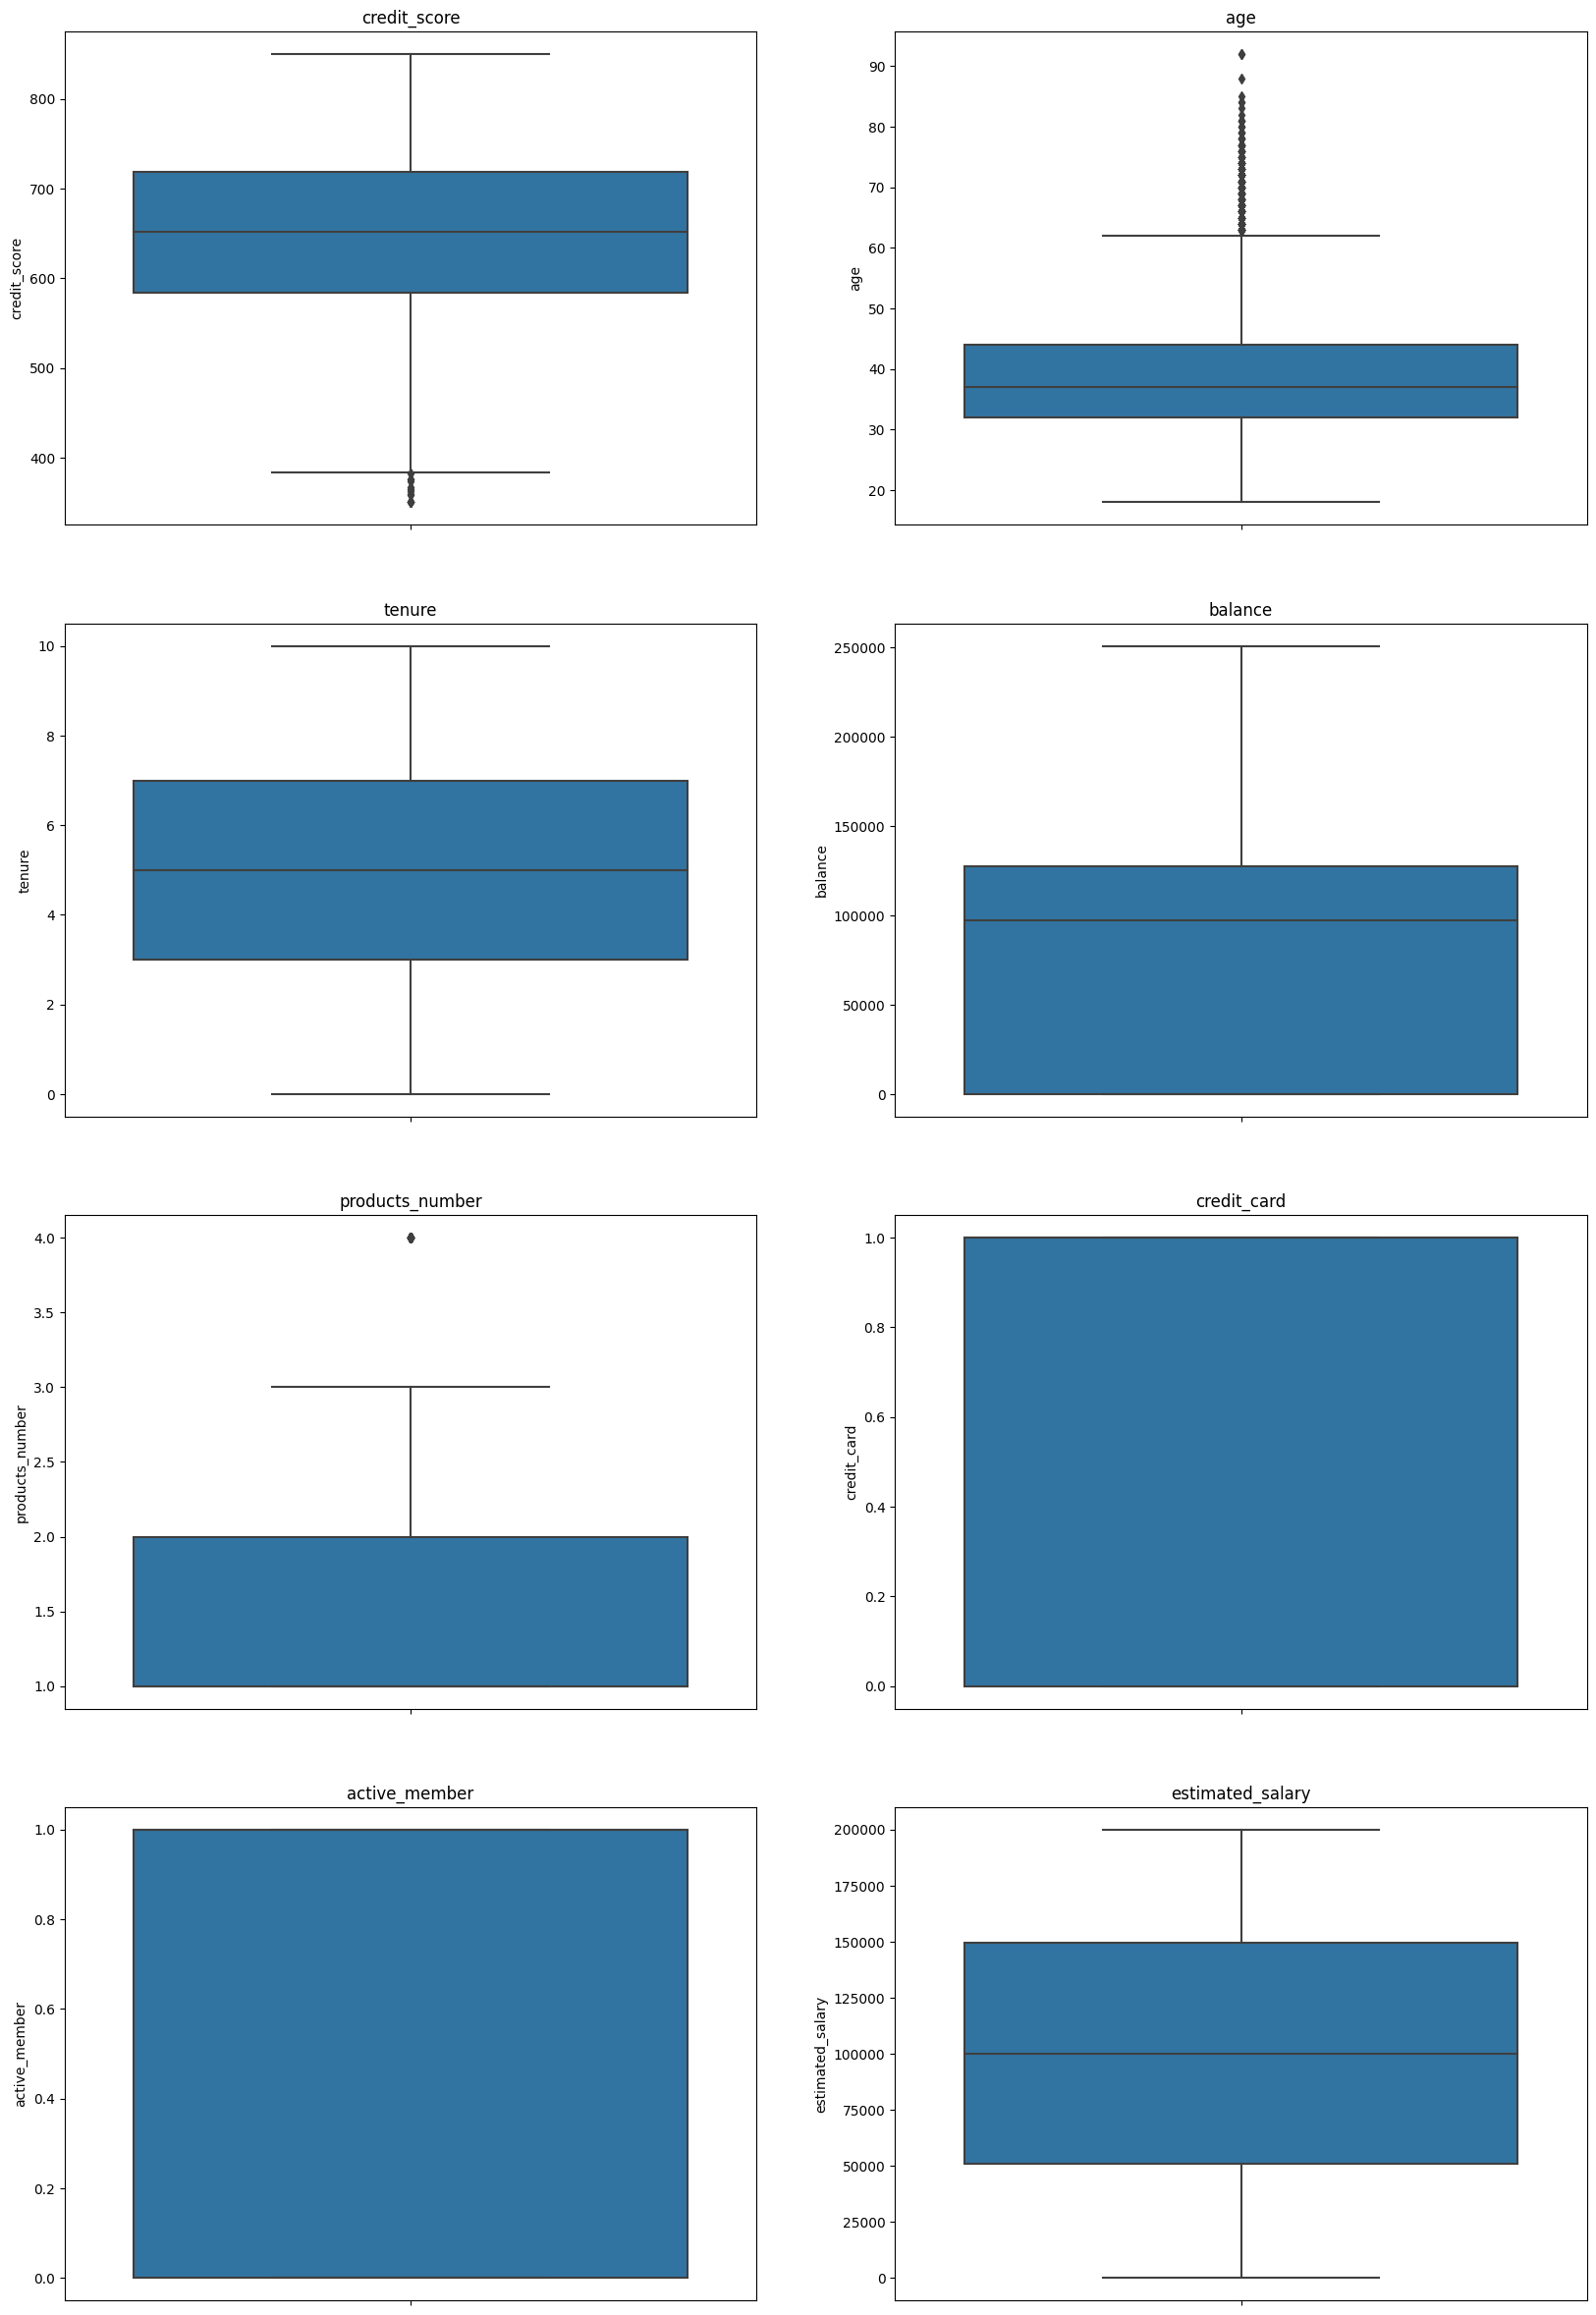

In [65]:
fig, axes = plt.subplots(nrows = 4, ncols = 2)    
axes = axes.flatten()         
fig.set_size_inches(20,30)

for ax, col in zip(axes, df1.columns):
  sns.boxplot(y=df1[col], hue='churn', ax = ax , data=df1)
  ax.set_title(col)

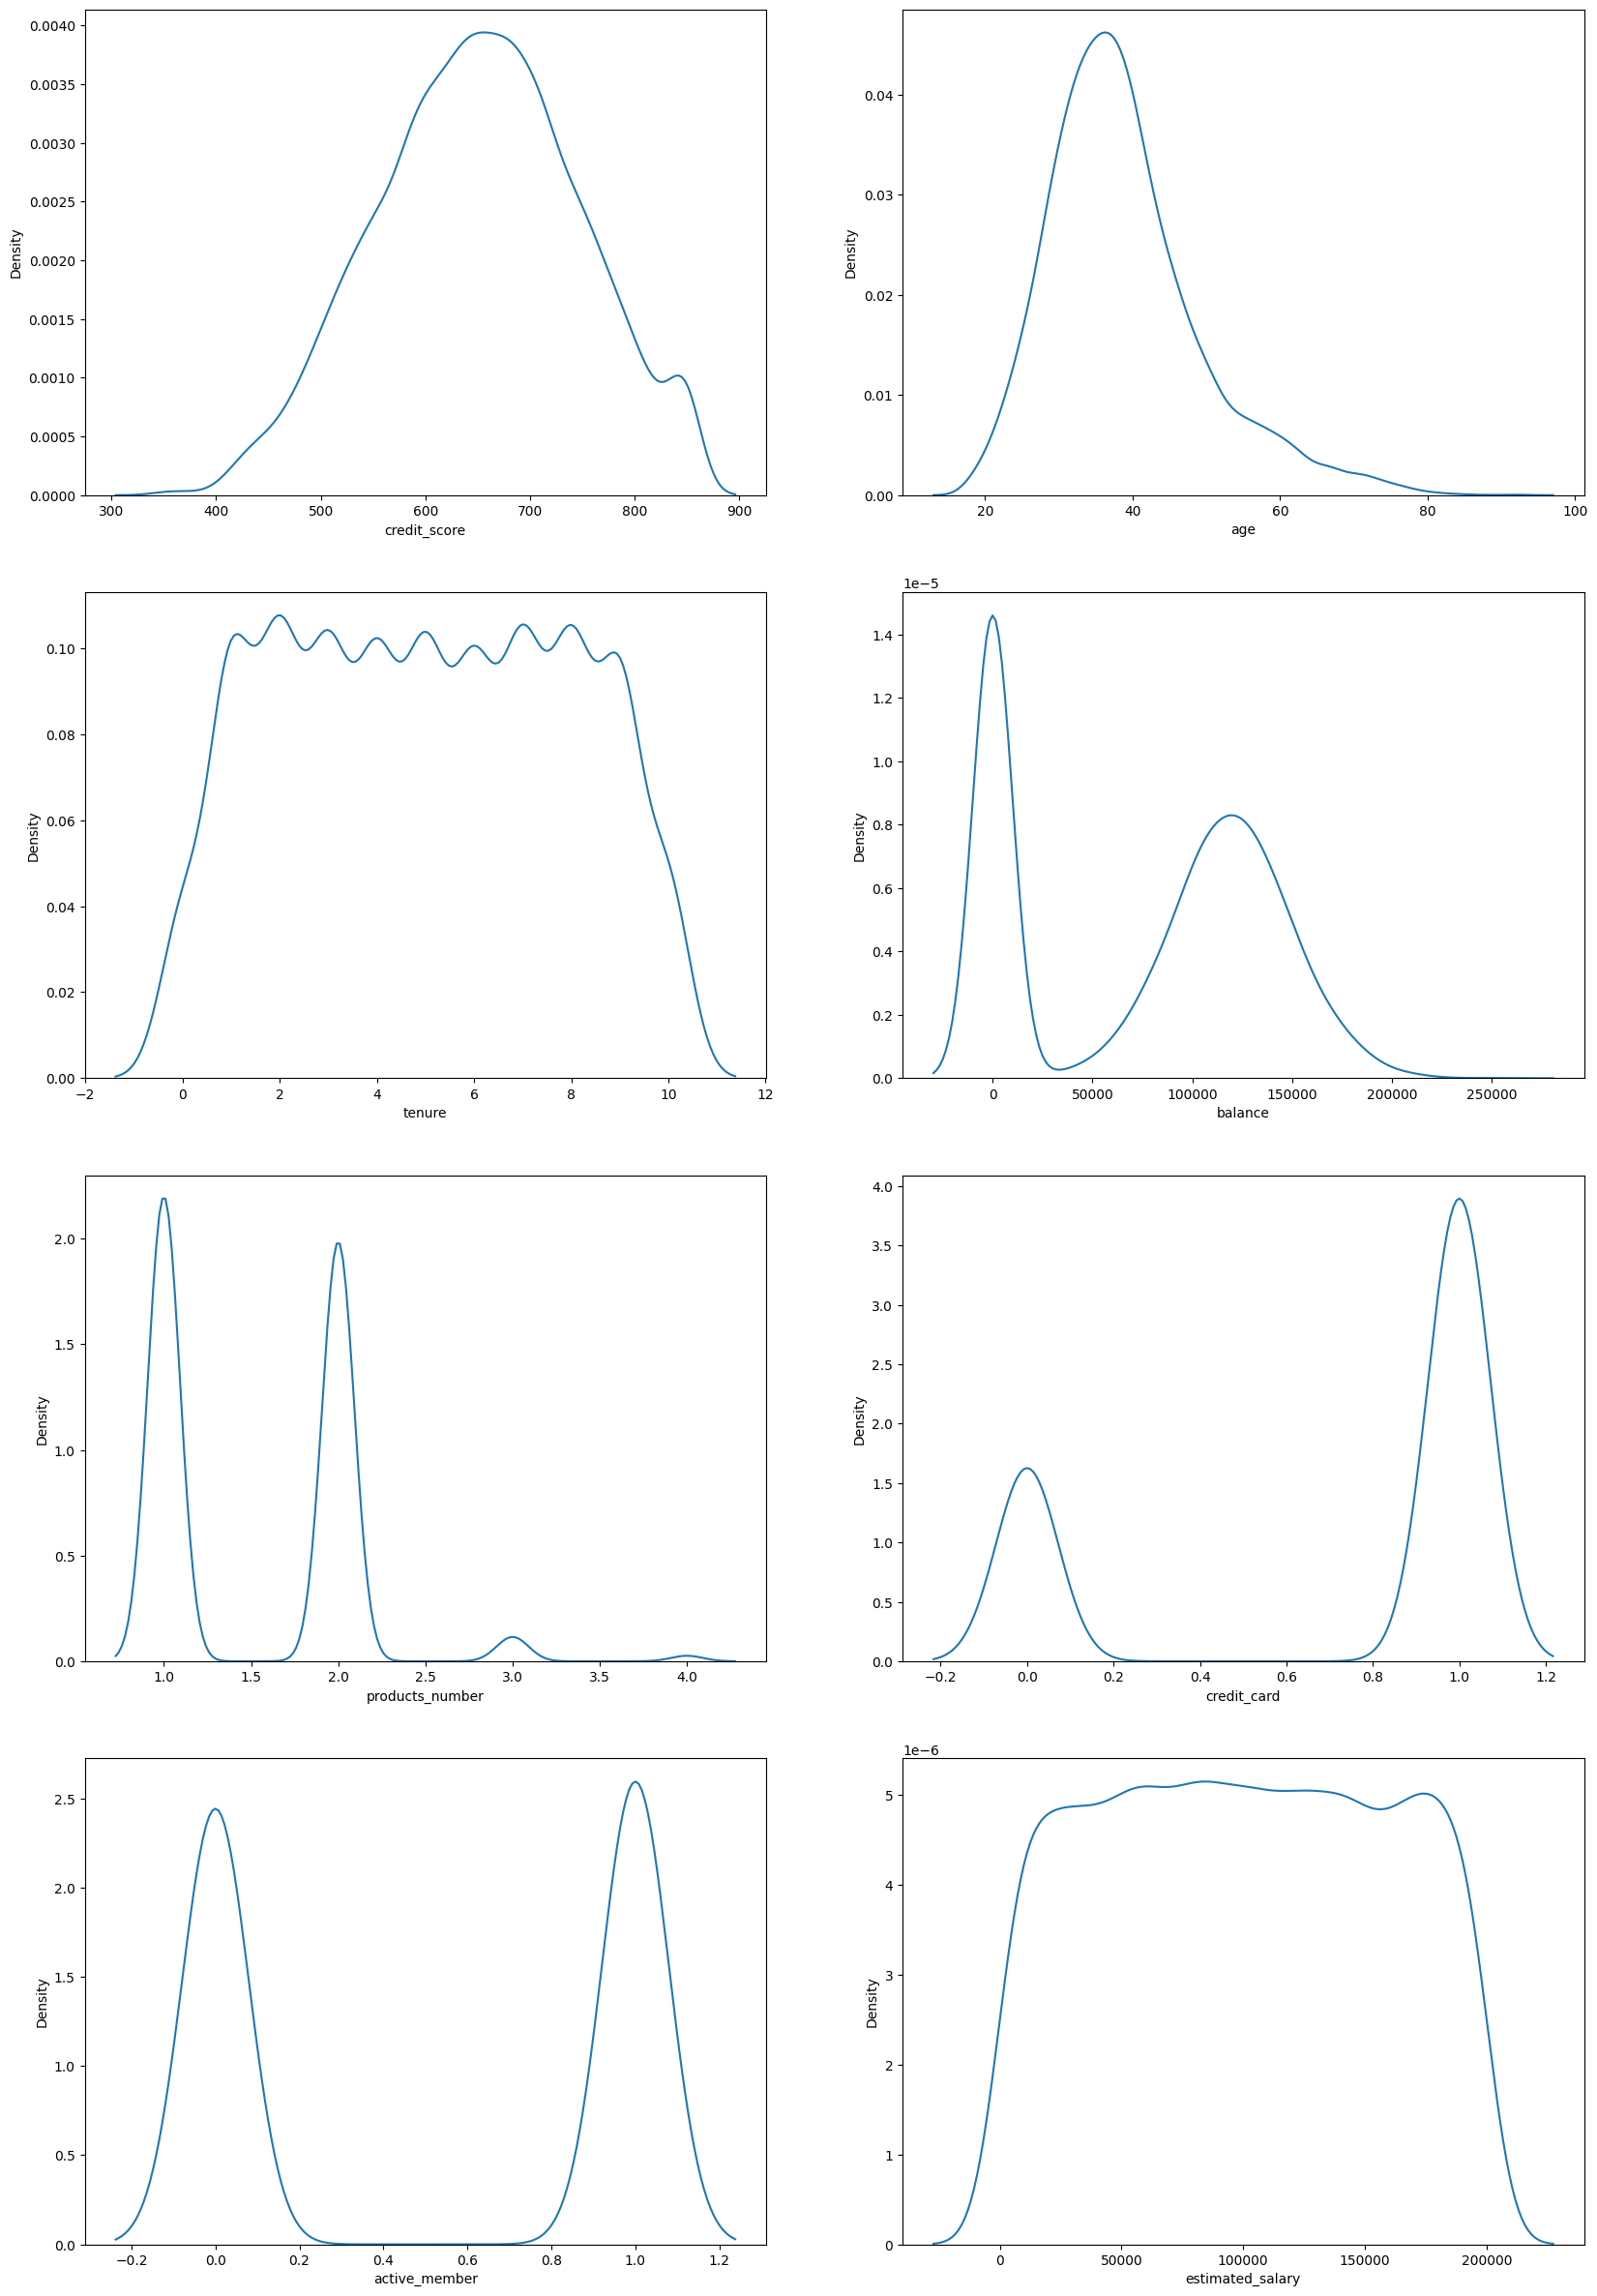

In [66]:
fig, axes = plt.subplots(nrows = 4, ncols = 2)    
axes = axes.flatten()         
fig.set_size_inches(20,30)

for ax, col in zip(axes, df1.columns):
  sns.kdeplot(df1[col], ax = ax)

In [67]:
df = pd.get_dummies(df,columns=['country','gender'],drop_first=True)

<Axes: >

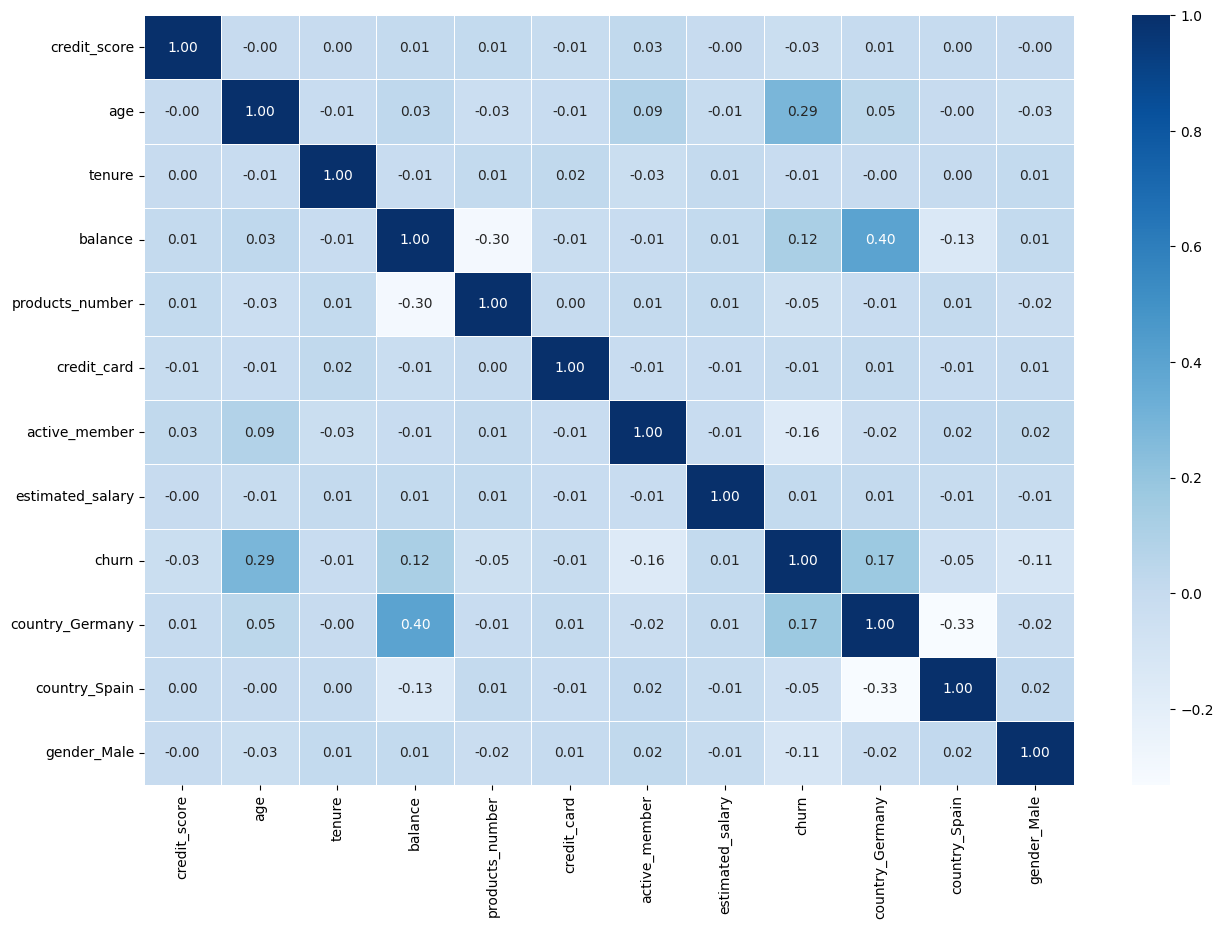

In [68]:
correlation_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', linewidths=0.5, fmt='.2f')

<Axes: xlabel='credit_score', ylabel='age'>

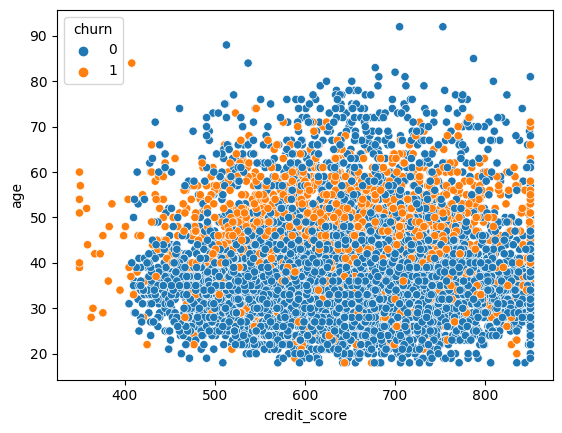

In [69]:
sns.scatterplot(x='credit_score', y='age', hue='churn', data=df)

<Axes: xlabel='balance', ylabel='age'>

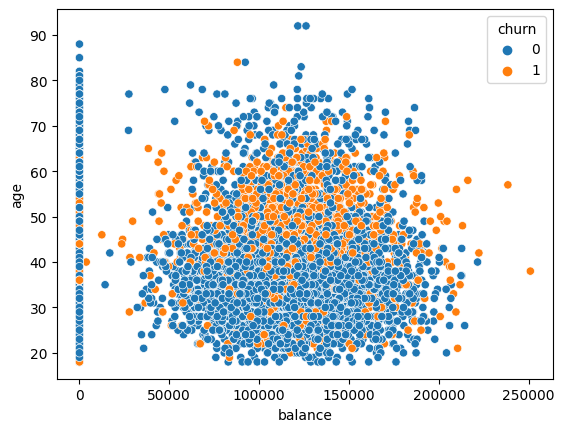

In [70]:
sns.scatterplot(x='balance', y='age', hue='churn', data=df)

<Axes: xlabel='estimated_salary', ylabel='balance'>

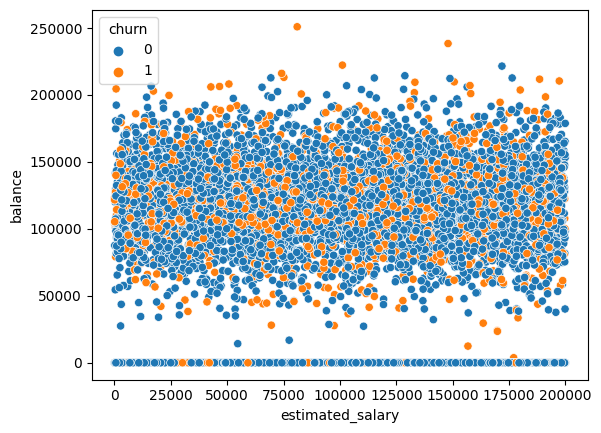

In [71]:
sns.scatterplot(x='estimated_salary', y='balance', hue='churn', data=df)

# **FEATURE SCALING**

In [72]:
X=df.drop(['churn'],axis=1)
y=df['churn']

In [73]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y)
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

***Will try Random Forest , Logistic Regression ,KNN and will also try DL***

# **RANDOM FOREST**

In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None , 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

In [76]:
rfc=RandomForestClassifier()
rf_Grid=GridSearchCV(estimator=rfc,param_grid=param_grid,cv=3,verbose=0,n_jobs=-1,return_train_score=False)

In [ ]:
rf_Grid.fit(X_train,y_train)
rf_Grid.best_params_

In [ ]:
rf=RandomForestClassifier(**rf_Grid.best_params_)

In [ ]:
rf.fit(X_train,y_train)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score , f1_score
import sklearn.metrics as metrics
y_pred1=rf.predict(X_test)
score_rf=accuracy_score(y_test,y_pred1)
score_rf

In [ ]:
f1_rf=f1_score(y_pred1,y_test)
f1_rf

In [ ]:
cm = metrics.confusion_matrix(y_test, y_pred1)
print(classification_report(y_test, y_pred1))

In [ ]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')

# **LOGISTIC REGRESSION**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lgr=LogisticRegression()

In [ ]:
param_grid = {
    'penalty': ['l1','l2'],
    'solver' :['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky'],
    'max_iter': [1000,1500,2000],
    'multi_class' :['auto', 'ovr', 'multinomial'],
    'class_weight' :['dict','balanced']
}

In [ ]:
lgr_grid=GridSearchCV(estimator=lgr,param_grid=param_grid,cv=3,verbose=0,n_jobs=-1,return_train_score=True)

In [ ]:
lgr_grid.fit(X_train,y_train)
lgr_grid.best_params_

In [ ]:
log=LogisticRegression(**lgr_grid.best_params_)

In [ ]:
log.fit(X_train,y_train)

In [ ]:
y_pred2=log.predict(X_test)
score_log=accuracy_score(y_test,y_pred2)
score_log

In [ ]:
f1_log=f1_score(y_pred2,y_test)
f1_log

In [ ]:
cm = metrics.confusion_matrix(y_test, y_pred2)
print(classification_report(y_test, y_pred2))

In [ ]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')

# **KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier 
param_grid = [{
    'n_neighbors': range(3,21),
    'algorithm':['ball_tree','kd_tree','brute'],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}]


In [ ]:
knn_Grid= GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=3, verbose=0, n_jobs=-1)

In [ ]:
knn_Grid.fit(X_train,y_train)
knn_Grid.best_params_

In [ ]:
knn=KNeighborsClassifier(**knn_Grid.best_params_)

In [ ]:
knn.fit(X_train,y_train)

In [ ]:
y_pred3=knn.predict(X_test)
score_knn=accuracy_score(y_pred3,y_test)
score_knn

In [ ]:
f1_knn=f1_score(y_pred3,y_test)
f1_knn

In [ ]:
cm = metrics.confusion_matrix(y_test, y_pred3)
print(classification_report(y_test, y_pred3))

In [ ]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')

# **DL(ANN)**

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [ ]:
import kerastuner as kt

In [ ]:
def build_model(hp):
    model = Sequential()
    counter=0
    for i in range(hp.Int('num_layers',min_value=1,max_value=10)):
        if counter==0 :
            model.add(Dense(hp.Int('units'+str(i),min_value=4,max_value=24,step=4),activation=hp.Choice('activation' + str(i),values=['relu','tanh','sigmoid']),input_dim=11))
            model.add(Dropout(hp.Choice('drp'+str(i),values=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])))
        else : 
            model.add(Dense(hp.Int('units'+str(i),min_value=4,max_value=24,step=4),activation=hp.Choice('activation' + str(i),values=['relu','tanh','sigmoid'])))
            model.add(Dropout(hp.Choice('drp'+str(i),values=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])))
            counter+=1
    model.add(Dense(1,activation='sigmoid'))
    
    model.compile(optimizer=hp.Choice('optimizer',values=['rmsprop','adam','sgd','nadam']),loss='binary_crossentropy',metrics=['accuracy'])
    return model

In [ ]:
tuner=kt.RandomSearch(build_model,objective='val_accuracy',max_trials=3)

In [ ]:
tuner.search(X_train,y_train,epochs=5,validation_data=(X_test,y_test))

In [ ]:
tuner.get_best_hyperparameters()[0].values

In [ ]:
model=tuner.get_best_models(num_models=1)[0]

In [ ]:
model.summary()

In [ ]:
model.fit(X_train,y_train,epochs=100,initial_epoch=5,validation_data=(X_test,y_test))

In [ ]:
y_rec = model.predict(X_test)

In [ ]:
y_pred = np.where(y_rec>=0.5,1,0)

In [ ]:
from sklearn.metrics import accuracy_score
score_ann=accuracy_score(y_test,y_pred)
score_ann

In [ ]:
f1_ann=f1_score(y_pred,y_test)
f1_ann

In [ ]:
cm = metrics.confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

In [ ]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')

In [ ]:
print('ACCURACY')
print('Accuracy of RF is',score_rf)
print('Accuracy of Logistic Regession is',score_log)
print('Accuracy of KNN is',score_knn)
print('Accuracy of ANN is',score_ann)

In [ ]:
print('F1 SCORE')
print('F1 SCORE of RF is',f1_rf)
print('F1 SCORE of Logistic Regession is',f1_log)
print('F1 SCORE of KNN is',f1_knn)
print('F1 SCORE of ANN is',f1_ann)

# **CONCLUSION**

* We can see that the accuracy follows the order - Random Forst -> ANN -> KNN -> Logistic Regression
* The F1 score follows the order ANN -> Random Forst ->  Logistic Regression ->KNN
* The prediction for Churn(0) is quite good but for Churn(1) is not so good.